# Preparing the data for analysis¶


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as ss

ModuleNotFoundError: No module named 'pandas'

In [2]:
df=pd.read_csv("G:\datasets\decode11.3\dataset.csv")

In [6]:
df["Created Time (Ticket)"]=pd.to_datetime(df["Created Time (Ticket)"])
df["Ticket Closed Time"]=pd.to_datetime(df["Ticket Closed Time"],errors="coerce")
df["First Response Time"]=pd.to_datetime(df["First Response Time"])

In [7]:
df.dtypes

Ticket Id                       float64
Student or WP                    object
Program Name                     object
Status (Ticket)                  object
Created Time (Ticket)    datetime64[ns]
Ticket Closed Time       datetime64[ns]
First Response Time      datetime64[ns]
Project Phase                    object
dtype: object

#### all the relevant column is converted to datetime

# 2. Fill Missing Values with Appropriate Method.

In [8]:
df.isnull().sum().sort_values(ascending=False)

First Response Time      115
Ticket Closed Time        13
Ticket Id                  5
Student or WP              5
Program Name               5
Status (Ticket)            5
Created Time (Ticket)      5
Project Phase              5
dtype: int64

In [48]:
df.head(2)

,Ticket Id,Student or WP,Program Name,Status (Ticket),Created Time (Ticket),Ticket Closed Time,First Response Time,Project Phase,duration,time,ticket_close,easy_solve
6,6404.0,Student,Fullstack Program,Deleted,2021-05-14 01:12:00,2021-05-14 01:13:00,2021-05-18 19:24:00,fullstack-phase-2,4 days 18:12:00,0 days 00:01:00,14-05-2021,0 days 00:01:00
17,6410.0,Student,Fullstack Program,Deleted,2021-05-14 01:46:00,2021-05-14 02:05:00,2021-05-18 19:24:00,fullstack-phase-3,4 days 17:38:00,0 days 00:19:00,14-05-2021,0 days 00:19:00


#### we are about to drop Ticket Id column because without value in ticket id column no further analysis is possible .

In [10]:
df.dropna(axis="rows",how="any",subset=["Ticket Id"],inplace=True)

In [11]:
df.isnull().sum().sort_values(ascending=False)

First Response Time      110
Ticket Closed Time         8
Ticket Id                  0
Student or WP              0
Program Name               0
Status (Ticket)            0
Created Time (Ticket)      0
Project Phase              0
dtype: int64

### 
### After dealing with Ticket id column null values , now we have only  two column which have null values  

#### Because,in remaining record we dont have any null value in ticket id column so it is not good idea that we drop other values thats why it is good to replace with mode.

In [12]:
df["First Response Time"].fillna(df["First Response Time"].mode()[0],inplace=True)

In [13]:
df["Ticket Closed Time"].fillna(df["Ticket Closed Time"].mode()[0],inplace=True)

In [15]:
df.isnull().sum().sort_values(ascending=False)

Ticket Id                0
Student or WP            0
Program Name             0
Status (Ticket)          0
Created Time (Ticket)    0
Ticket Closed Time       0
First Response Time      0
Project Phase            0
dtype: int64

### To deal with Ticket Closed Time and First Response Time column null value I replaced with mode of respective data

# 3 Check how many Students and Work Professionals are raising queries, who’s queries are more.

In [16]:


df["Student or WP"].value_counts()


Working Professionals    328
Student                  148
Name: Student or WP, dtype: int64

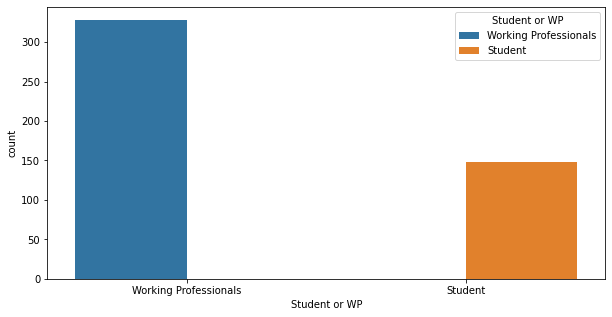

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x="Student or WP",hue="Student or WP",data=df)
plt.show()

### 148 students are raising queries and 328 working professionals are raising query

# 4.What is the Average time taken to respond to a query?

In [18]:
from datetime import datetime


In [20]:
time=df["First Response Time"]-df["Created Time (Ticket)"]

In [21]:
time

0       0 days 07:42:00
1       4 days 09:12:00
2       0 days 06:28:00
3       0 days 13:37:00
4       0 days 00:04:00
             ...       
471     0 days 00:03:00
472     0 days 00:59:00
473   -3 days +20:14:00
474   -3 days +19:45:00
475     0 days 00:49:00
Length: 476, dtype: timedelta64[ns]

In [22]:
Average_time=time.sort_values().sum()/476


#### The average time to respond a query is 10:17:40.966386554

# 5.List down top 10 queries that took longest time to resolve.

In [23]:
df["duration"]=df["First Response Time"]-df["Created Time (Ticket)"]

In [24]:
df.sort_values("duration",ascending=False,inplace=True)

In [25]:
df.head(10)

,Ticket Id,Student or WP,Program Name,Status (Ticket),Created Time (Ticket),Ticket Closed Time,First Response Time,Project Phase,duration
6,6404.0,Student,Fullstack Program,Deleted,2021-05-14 01:12:00,2021-05-14 01:13:00,2021-05-18 19:24:00,fullstack-phase-2,4 days 18:12:00
17,6410.0,Student,Fullstack Program,Deleted,2021-05-14 01:46:00,2021-05-14 02:05:00,2021-05-18 19:24:00,fullstack-phase-3,4 days 17:38:00
1,6415.0,Working Professionals,Backend Program,Duplicate,2021-05-14 10:12:00,2021-05-14 11:23:00,2021-05-18 19:24:00,trial phase,4 days 09:12:00
29,6433.0,Working Professionals,Fullstack Program,Duplicate,2021-05-14 13:11:00,2021-05-14 20:46:00,2021-05-18 19:24:00,fullstack-phase-2,4 days 06:13:00
30,6434.0,Working Professionals,Fullstack Program,Duplicate,2021-05-14 13:12:00,2021-05-14 20:47:00,2021-05-18 19:24:00,fullstack-phase-2,4 days 06:12:00
32,6455.0,Working Professionals,Backend Program,Deleted,2021-05-14 15:16:00,2021-05-14 15:17:00,2021-05-18 19:24:00,system-issues,4 days 04:08:00
20,6468.0,Working Professionals,Backend Program,Duplicate,2021-05-14 16:43:00,2021-05-17 11:44:00,2021-05-18 19:24:00,system-issues,4 days 02:41:00
35,6469.0,Working Professionals,Backend Program,Deleted,2021-05-14 16:44:00,2021-05-14 17:14:00,2021-05-18 19:24:00,system-issues,4 days 02:40:00
37,6470.0,Working Professionals,Backend Program,Duplicate,2021-05-14 16:45:00,2021-05-17 11:43:00,2021-05-18 19:24:00,system-issues,4 days 02:39:00
43,6485.0,Working Professionals,Backend Program,Deleted,2021-05-14 19:34:00,2021-05-14 20:03:00,2021-05-18 19:24:00,backend-phase-3,3 days 23:50:00


# 6. Which Phase of Project is having highest Queries?


In [26]:

df["Project Phase"].value_counts()

fullstack-phase-2     96
fullstack-phase-1     88
system-issues         77
fellowship-phase-1    46
backend-phase2        45
trial phase           32
backend-phase1        29
fullstack-phase-3     29
fullstack-phase-4     17
backend-phase-3       17
Name: Project Phase, dtype: int64

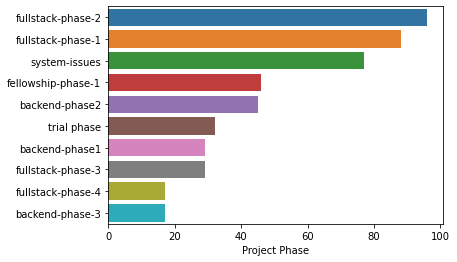

In [44]:
b=df["Project Phase"].value_counts().index
sns.barplot(x=df["Project Phase"].value_counts(),y=b)
plt.show()


# 7.Which project phase queries are taking a long time to resolve?

In [27]:
df["time"]=df["Ticket Closed Time"]-df["First Response Time"]

In [28]:
df["time"]=df["Ticket Closed Time"]-df["Created Time (Ticket)"]

In [29]:
df.head(2)

,Ticket Id,Student or WP,Program Name,Status (Ticket),Created Time (Ticket),Ticket Closed Time,First Response Time,Project Phase,duration,time
6,6404.0,Student,Fullstack Program,Deleted,2021-05-14 01:12:00,2021-05-14 01:13:00,2021-05-18 19:24:00,fullstack-phase-2,4 days 18:12:00,0 days 00:01:00
17,6410.0,Student,Fullstack Program,Deleted,2021-05-14 01:46:00,2021-05-14 02:05:00,2021-05-18 19:24:00,fullstack-phase-3,4 days 17:38:00,0 days 00:19:00


In [30]:
df[["time","Project Phase"]].groupby(by="Project Phase").sum().sort_values(by="time",ascending=False)

,time
Project Phase,
fullstack-phase-2,82 days 20:38:00
fullstack-phase-1,80 days 12:35:00
system-issues,54 days 22:49:00
backend-phase2,37 days 19:52:00
fellowship-phase-1,37 days 19:01:00
backend-phase1,27 days 06:02:00
fullstack-phase-4,25 days 21:32:00
trial phase,25 days 02:45:00
fullstack-phase-3,18 days 16:26:00


### fullstack phase-2  project phase is taking longest time to resolve

# 8. On which day highest queries were resolved?


In [31]:
df["ticket_close"]=df["Ticket Closed Time"].apply(lambda x:x.strftime("%d-%m-%Y"))

In [32]:
df.head(2)

,Ticket Id,Student or WP,Program Name,Status (Ticket),Created Time (Ticket),Ticket Closed Time,First Response Time,Project Phase,duration,time,ticket_close
6,6404.0,Student,Fullstack Program,Deleted,2021-05-14 01:12:00,2021-05-14 01:13:00,2021-05-18 19:24:00,fullstack-phase-2,4 days 18:12:00,0 days 00:01:00,14-05-2021
17,6410.0,Student,Fullstack Program,Deleted,2021-05-14 01:46:00,2021-05-14 02:05:00,2021-05-18 19:24:00,fullstack-phase-3,4 days 17:38:00,0 days 00:19:00,14-05-2021


In [33]:
df["ticket_close"].value_counts()

18-05-2021    127
19-05-2021     99
16-05-2021     75
20-05-2021     66
17-05-2021     55
14-05-2021     23
21-05-2021     19
15-05-2021     11
22-05-2021      1
Name: ticket_close, dtype: int64

<AxesSubplot:xlabel='ticket_close'>

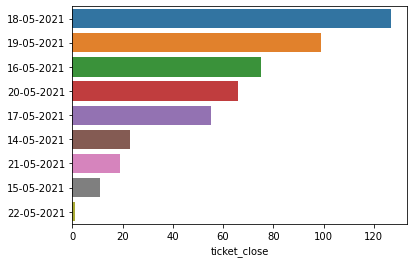

In [45]:
c=df["ticket_close"].value_counts().index
sns.barplot(x=df["ticket_close"].value_counts(),y=c)
plt.show()

### on date 18-05-2021 127 queries get solved

# 9. Which phase queries are easier to resolve?

In [40]:
df["easy_solve"]=df["Ticket Closed Time"]-df["Created Time (Ticket)"]

In [42]:
print(df[["Project Phase","time"]].groupby(by="Project Phase").sum().sort_values(by="time"))


                               time
Project Phase                      
backend-phase-3    17 days 18:41:00
fullstack-phase-3  18 days 16:26:00
trial phase        25 days 02:45:00
fullstack-phase-4  25 days 21:32:00
backend-phase1     27 days 06:02:00
fellowship-phase-1 37 days 19:01:00
backend-phase2     37 days 19:52:00
system-issues      54 days 22:49:00
fullstack-phase-1  80 days 12:35:00
fullstack-phase-2  82 days 20:38:00


### backend phase  project phase is easy to solve 

# 10.Provide Conclusion for your analysis.

#### as per dataset provided, we have some queries to figure out from the dataset. in the dataset there is more working professional than student thats why their query is also more.average time for figuring out the query is about 10hrs which is great. 4 out of top 10 queries which took more time to resolve are system issue.on the date 18-05-2021 127 queries solved and in last most easy query to resolve was backend-phase-3
  